# NOTES CPSC 330 PART 2

## Lecture 11 (Ensembles)

1. Pre-Lecture

- combined multiple ML models to create more powerful model
- diverse groups 
- many types, most successful are tree-based ensemble models (random forests FR, gradient boosted trees GBM)
- single decision tree likely to overfit. Idea is to create multiple
trees and combine them. 

A. Random forests
- collection of diverse decision trees
- each tree overfit on some part of the data but reduce overfiting by averaging
- in FIT, inject randomness in the classifier construction (Data: Bootstrap sample, Feature: at each node select random subset of features controlled by max_features

- HP: \
-- `n_estimators`: number of decision trees (higher = more complexity) \
-- `max_depth`: max depth of each decision tree (higher = more complexity) \
-- `max_features`: the number of features you get to look at each split (higher = more complexity)

- Strengths: no scaling, less likely overfit, capture better broad picture
- Weaknesses: require more memory, harder interpret, poorly on sparse data like text
- check true false.

B. Gradient Boosted Tree
- no random, combine many simple models called weak learners to create a strong learner
- combine multiple shallow (depth 1-5)
- build tree in serial manner, where each tree tries to correct the mistakes of the previous one (depend previous one)
- important HP: 1. n_estimators (control the number of trees to build), 2. learning_rate (control how strongly each tree tries to correct mistakes from the previous tree) Higher meaning stronger, more complex 
- three commons GBT: XGBoost,LightGBM, CatBoost
B.1 XGBoost
- not in sklearn, better than random forest
B.2 LightGBM
- not in sklearn, small model size, faster, better than RF
B.3 Catboost
- not in sklearn, slower but better results

- after calc CV score for all the classifiers, do HP tuning on each
- notice DT, RF overfit
- what classi to use? one with HIGHEST CV score, but make sure you are not overusing the validation set. Also care about 'interpretability'. DT or linear models are easier understand. Lastly care speed/code maintenance. 

C. Averaging
- let them vote during prediction time. Say apply 3 models to example. 2 good 1 bad, the vote is in favor of good so it is good. 
- This `VotingClassifier` will take a _vote_ using the predictions of the constituent classifier pipelines.
- Main parameter: `voting` \
-- `voting='hard'`: it uses the output of `predict` and actually votes. \
-- `voting='soft'`: with `voting='soft'` it averages the output of `predict_proba` and then thresholds / takes the larger.
- sometimes average do better than the best model. In short, as long as the different models make different mistakes, this can work.

D. Stacking 
- Instead of averaging the outputs of each estimator, instead use their outputs as _inputs to another model_.
- by default uses Logistic regression
- The features going into the logistic regression are the classifier outputs, _not_ the original features!
- So the number of coefficients = the number of base estimators!
- it is doing CV in CV like a loop 
- What is an advantage of ensembling multiple models as opposed to just choosing one of them?
    - You may get a better score.
- What is an disadvantage of ensembling multiple models as opposed to just choosing one of them?
    - Slower, more code maintenance issues.
    
- overall performance: stacking > voting > GBT > RF > DT
- but speed and computational capacity is reversed

<div>
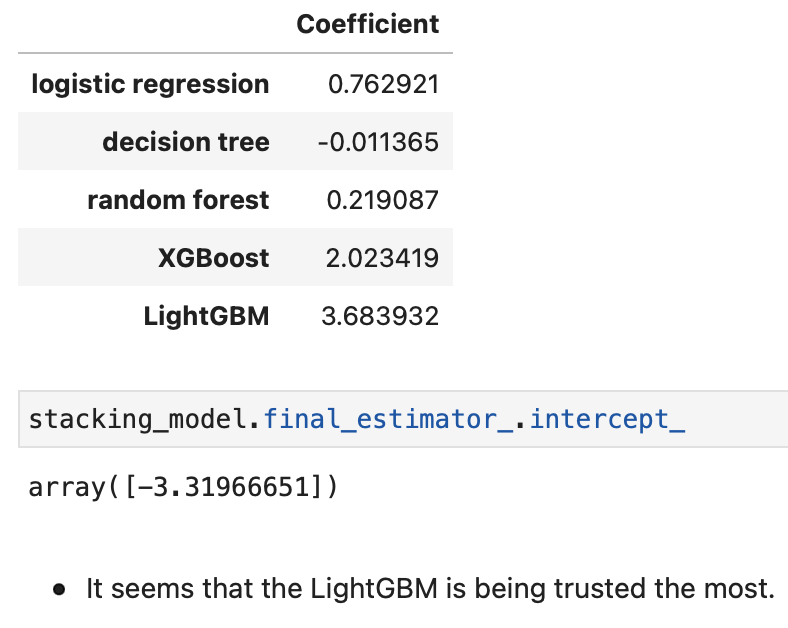
</div>

## Lecture 12 (feature importances, model interpretation)

1. Pre-Lecture

A. Model interpretability 
- need reason / explanation to model results to explain to other experts in industries (bank, healthcare)
- our def of model interpretability will be looking at feature importances
- tradeoff accurate and interpretable
- feature importances refer to a technique used to identify which input features or variables contribute the most to the performance of a predictive model.
- ex: in linear models, just coefficients of the features

B. Beyond Linear models
- sklearn feature_importances, eli5 (explain like im 5), SHAP
- 1. feature_importances: for tree based models, its calculated based on impurity (gini index or info gain). They do not have sign (dont say if go up or down, bc could do both). Depending on the model (RF, logistic) some feature important for one but not for the other.

- 2. eli5 (non sklearn models). ranks feature in weight. these values tell us globally about which features are important. 

- 3. SHAP: to explain a specific prediction 


2. Lecture note

A. Correlation
- pos, neg, uncorr. 
- X high pos Y: early hint that X is a useful feature in predicting Y.
- however simplistic.
- sometimes, adding or removing features together improve / worsens another feature.
- ex: feature X is good when feature Y is added but useless by itself.

B. Feature importances in linear models
- ordinal feature: increasing by 1 order increase by X coefficient the predicted Y.
- categorical: each category is OHE, and each has a coefficient. say cat X1, X2, X3. Make X1 the "reference category" by doing X1-X1, then X2-X1, X3-X1. Interpretation: If you change from cat X1 to cat X2, the prediction change by X2 coeff. Careful: not do ordinal on that, maybe order X1,X2,X3 random. 

- numerical: \
More difficult. If scaled data, then a unit increase is not increasing but the given coefficient. The scaler substracted the mean and divided by the standard deviation. We dont care about the substraction, only about the scaling (divide by sd). Thus actual_unit_change_coeff = $\frac{\text{coeff_scaled}}{sd}$

C. Model interpretability 
- each node in a network does not have a meaning, its part of the system.
- feature importance from a model (eli5) might differ from another one. results not absolute. 
- also weight coeff value has no meaning, if say 0.5 it does not mean that unit increase will increase predict by 0.5.

D. SHAP 
- a sophisticated meature of the contribution of each feature.
- class example. SHAP dependence plot with age and education. Try predict salary > 50k. for low age, it means "a person with young age wont be able to use age as a feature to predict salary. But a higher age can contribute." 
- summary plot: shows "if a feature has X value, will it be important to predict or not". for ex, married: if yes, will contribute to prediction, if no, does not, move on to another feature. 

<br><br>

## Lecture 13 (feature engineering, feature selection)

### Part A

- **Feature engineering** is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.<br> 

1. better features usually help more than better models

- Good features would ideally:
    - capture most important aspects of the problem
    - allow learning with few examples 
    - generalize to new scenarios.

- There is a trade-off between simple and expressive features:
    - With simple features overfitting risk is low, but scores might be low.
    - With complicated features scores can be high, but so is overfitting risk.

2. The best feature may be dependent on the model you use

- Examples:
    - For counting-based methods like decision trees separate relevant groups of variable values
        - Discretization makes sense 
    - For distance-based methods like KNN, we want different class labels to be "far".
        - Standardization 
    - For regression-based methods like linear regression, we want targets to have a linear dependency on features.
    
    
3. Common features used in text classification
- bag of words, but does not care about work ordering. Use feature engineering
- ex: label personalized important emails. Some emails might be more important to some, some emails might be more spam to some.\

A. sol: social, content, thread features.

B. Ngrams: a continuous sequence of $n$ items (characters, tokens) in text. 
- ex: I am gay. n=1 (col1): I. n=2 (col2): I am. n=3 (col3): I am gay. 

C. Part of speech feature
- Part-of-speech: A kind of syntactic category that tells you some of the grammatical properties of a word.
    * Noun &rarr; water, sun, cat  
    * Verb &rarr; run, eat, teach

    
<blockquote>
The ____ was running. 
</blockquote>    

- Only a noun fits here. 

ex: <b>You</b> may <b>disclose</b> Google confidential information when compelled to do so by law if <b>you</b> provide <b>us</b> reasonable prior notice, unless a court orders that <b>we</b> not receive notice.
</blockquote>

- A very simple solution
    * Look for pronouns and verbs. 
    * Add POS tags as features in your model. 
    * Maybe look up words similar to **disclose**.
    
<br>

4. Classify music style from audio
- task: given a new set of raw data audio file, predict the music style of the audio (here blues, classic, pop, rock)
- domain specific features (MFCC features) 

### Part B Feature selection

1.
- Def: Find the features	(columns) $X$ that are important for predicting	$y$, and remove the features that aren't. 

- Given $X = \begin{bmatrix}x_1 & x_2 & \dots & x_n\\  \\  \\  \end{bmatrix}$ and $y = \begin{bmatrix}\\  \\  \\  \end{bmatrix}$, find the columns $1 \leq j \leq n$ in $X$ that are important for predicting $y$.

2. Why feature selection?

- Interpretability: Models are more interpretable with fewer features. If you get the same performance with 10 features instead of 500 features, why not use the model with smaller number of features?     
- Computation: Models fit/predict faster with fewer columns.
- Data collection: What type of new data should I collect? It may be cheaper to collect fewer columns.
- Fundamental tradeoff: Can I reduce overfitting by removing useless features?

Feature selection can often result in better performing (less overfit), easier to understand, and faster model. 

3. How?
- domain knowledge or automatix feature selection methods from sklearn: model based selec, recursive feat elimination and forward selec

4. Model-based selection 
- SML to measure importance of each feature
- To use model-based selection, we use `SelectFromModel` transformer.
- It selects features which have the feature importances greater than the provided threshold.

5. Recursive feature elimination (RFE)
- Basic idea: -> fit model -> find least important feature -> remove -> iterate.
- RFE algorithm 

A. Decide $k$, the number of features to select. \
B. Assign importances to features, e.g. by fitting a model and looking at `coef_` or `feature_importances_`. \
C. Remove the least important feature. \
D. Repeat steps B-C until only $k$ features are remaining.

Note that this is **not** the same as just removing all the less important features in one shot!

- How do we know what value to pass to `n_features_to_select`? Use `RFECV` which uses cross-validation to select number of features. 

6. Search and score
- Define a **scoring function** $f(S)$ that measures the quality of the set of features $S$. 
- Now **search** for the set of features $S$ with the best score.

- General idea of search and score methods 
- Example: Suppose you have three features: $A, B, C$
    - Compute **score** for $S = \{\}$
    - Compute **score** for $S = \{A\}$
    - Compute **score** for $S= \{B\}$
    - Compute **score** for $S = \{C\}$
    - Compute **score** for $S = \{A,B\}$    
    - Compute **score** for $S = \{A,C\}$
    - Compute **score** for $S = \{B,C\}$
    - Compute **score** for $S = \{A,B,C\}$    
- Return $S$ with the best score.  
- How many distinct combinations we have to try out? $2^3$

7. Forward or backward selection 

- Also called wrapper methods
- Shrink or grow feature set by removing or adding one feature at a time 
- Makes the decision based on whether adding/removing the feature improves the CV score or not

8. Warning about feature selection
- A feature's relevance is only defined in the context of other features.
    - Adding/removing features can make features relevant/irrelevant.
- If features can be predicted from other features, you cannot know which one to pick. 
- Relevance for features does not have a causal relationship. 
- Don't be overconfident. 
    - The methods we have seen probably do not discover the ground truth and how the world really works.
    - They simply tell you which features help in predicting $y_i$ for the data you have.
    
    
True/False questions for class discussion:
   - Simple association-based feature selection approaches do not take into account the interaction between features. (F)
   - You can carry out feature selection using linear models by pruning the features which have very small weights (i.e., coefficients less than a threshold). (T)
   - Forward search is guaranteed to find the best feature set. (F)
   - The order of features removed given by `rfe.ranking_` is the same as the order of original feature importances given by the model. (F)

<br><br>

## Lecture 14 (Clustering)

1. Pre-lecture

A. Intro 
- most data out there is unlabeled
- want extract useful info from unlabeled data
- most intuitive: group similar examples together 
- def **clustering**: task of partitioning the dataset into groups called clusters
- goal: exs same group as similar as possible, exs diff group as diff as possible
- think of: coloring points where closest points are same color
- usually the clusters are identified bu a cluster label 
- there is no "correct" grouping, could group in diff ways. depends on application. usually help if we have some prior knowledge about the data and problem 
- common application: data exploration (summarize, compress data, partition data into groups before processing), customer segmentation (understand landscape of the market), document clustering (grouping articles from diff news sources)
- how clustering? similarity or distances between points

B. K-Means clustering algorithm
- two inputs: X (set of data points), K (number of clusters)
- calling predict of Kmeans will give us the cluster assignment for each data point. Each point will be assigned to a cluster (0,1,2) "same label".
- in Kmeans each cluster is represented by its cluster center "middle of the cluster".
- chicken and egg problem: know assignments to calc the cluster center, or have the cluster center to assign closest one to example?
- sol: iteration. assign each ex to the closest center. then estimate new centers as average of obs in cluster. stop until center stop changing or max iter has reached. 
- does not always converge to optimal center. 
- initialization is crutial. Will affect how many iterations we need. 

C. Choosing K
- HP K. n_clusters. 

- Method 1: Elbow method. sum of intra-cluster distances. which is also referred to as inertia. 
- formula:
$$ \sum_{P_i \in C_1}  distance(P_i, C_1)^2 + \sum_{P_i \in C_2}  distance(P_i, C_2)^2 + \sum_{P_i \in C_3} distance(P_i, C_3)^2$$

Where $C_1, C_2, C_3$ are centroids, $P_i$s are points within that cluster, $distance$ is the usual Euclidean distance. 
- inertia decreases as K increases. 
- trade-off: "small k" vs "small intra cluster distances". We dont want too big K and too small inertia. 

- Method 2: Silhouette method
   - Calculated using the **mean intra-cluster distance** ($a$) and the **mean nearest-cluster distance** ($b$) for each sample.
   - the difference between the **the average nearest-cluster distance** ($b$) and **average intra-cluster distance** ($a$) for each sample, normalized by the maximum value

$$\frac{b-a}{max(a,b)}$$

   - The best value is 1. 
   - The worst value is -1 (samples have been assigned to wrong clusters).
   - Value near 0 means overlapping clusters. 
   The overall **Silhouette score** is the average of the Silhouette scores for all samples. 
   
- What to look for in these plots?

   - Unlike inertia, larger values are better because they indicate that the point is further away from neighbouring clusters.
   - The thickness of each silhouette indicates the cluster size.
   - The shape of each silhouette indicates the "goodness" for points in each cluster.
   - The length (or area) of each silhouette indicates the goodness of each cluster.
   - A slower dropoff (more rectangular) indicates more points are "happy" in their cluster.

2. Lecture Notes
- now its unsupervised ML: algorithm that involves discovering patterns and relationships in data without the use of labeled examples or predefined output values. In other words, the algorithm learns to identify the underlying structure or distribution of the data without being explicitly told what the correct answers are.

- in supervised learning, we are given features X and targets y, in unsupervised we are given only X.

- inertia vs K: as K increase, inertia decreases. inertia is the avrg distance between points in cluster. intuitively, the more K clusters (groups), the less points per group, then avrg distance between the points is lower. 
- we like clusters of similar size, not in a "line", and not too small size. 

- silhouette plot: best rectangular with good size cluster, positive values towards one, clusters of same size.

- T/F:
   - When choosing a number of clusters, we want to minimize inertia. (F)
   - K-Means algorithm always converges to the same solution. (F)
   - In some iterations some points may be left unassigned. (F bc any points will look for the closest center, no matter how far it is) 
   - K-means terminates when the centroid locations do not change between iterations. (T)
   - It is possible to have negative silhouette score values. (T)

- in class example: customer segmentation
   - Their goal is to develop customized marketing campaigns and they ask you to group customers based on the given information. 
   - we have some missing values, imputation.
   - correlation matrix: purchases, one of purchases
   - trying to find K: finding n_clusters with elbow method. we do not see a clear elbow around k=6, thus maybe we should use the silhouette method instead. 
   - silhouette: shows uneven size for k = 4. 
   
- initialization
   - affects result
   - one strat is to run algorithm several times
   - smart way: K-Means++ 
   - Intuitively, it picks the initial centroids which are far away from each other. 



<br><br>

## Lecture 15: More clustering + DBSCAN

1. Pre-lecture

A. Limitations
- sklearn has a more scalable variant of "K-Means" called MiniBatchKMeans which can handle very large datasets.
- limitations of Kmeans: relies on random initializatoin so outcome may change depending upon this ini, requires to specify number of clusters in advance, elbow and silhouette method used to find opt number of clusters but not easy to interpret, lastly even outliers have to be assigned to a cluster, could affect cluster a lot. 
- more limitations: can capture relatively simple shapes, boundaries between clusters are linear, it fails to identify clusters with complex shapes. 
- ex fail: two half moons, boundary is linear so does not detect. 

B. DBSCAN
- Density Based Spatial Clustering alg. 
- not need specify number of clusters (but need specify 2 other HP)
- can identify complex shapes and does not need to assign every points to a cluster
- how does it work? iterative algorigthm. start at random point. check if part of crownded region. then "spread color" to neighbors. 
- what is "closed" and what is "crowded".
- HP1: `eps`. determine what it means for points to be 'close'
- HP2: `min_samples`. determine the number of neighboring points we require to consider in order for a point to be part of a cluster. 
- eps = 1 means consider close if distance is less or equal to 1. As we increase eps, we are more accepting of distance. 
- min_samples = 1 means min number of points in a cluster to be considered a crowded region. if = 2, min 2 points in cluster.
- more details bout DBSCAN: 3 kinds of points
   - core points: have at least min_samples points in their neighborhood
   - border points: with fewer than min_samples points in the neighborhood, but are connected to a core point
   - noise points: points which do not belong to any clusters. less than min_samples point within distance of eps of the starting point
   
- differences: not specify clusters, tune 2 HP, points can be unassigned, DB is not a predict method, only cluster the points we already have and not on new data

- go through plots of different eps and min_samples
- does the order you pick the points matter in DB? not rly, any of the clusters core points is able to fully identify the cluster with no randomness involved. 
- cannot use elbow method, but can use silhouette
- failure case: does not work well with clusters of different densities

C. Hierarchical clustering
- Main idea: start with each point in its own cluster, greddily merge most similar clusters tgt, repeat. 
- visualized using tool called 'dendrogram', scipy.cluster.hierarchy. Its a tree like plot. start from bottom, and go up by creating parent node. keep going. long branches mean that "for a while we kept the same clusters".
- how do we measure distance between clusters? the `linkage criteria` determined how to find similarity between clusters. some examples are: single linkage (min dist), average linkage (avrg dist), complete linkage (max dist), ward linkage 
- ex: single linkage: merge two clusters that have the smallest min dist between all their points. 
- need create linkage matrix. interpretation: c1 point in cluster1, c2 point in cluster2, obs is number of obs in new cluster
- you can use truncation when tree gets too large 

2. Lecture
- example: bunch of pictures, tell which one are from same person (similar)
- for lower eps, all images are labeled as noise (no group)
- for eps = 7 we get many noise points and many small clusters
- for eps = 8 and eps = 9 we get many noise points but we also get one large cluster and a few smaller clusters
- starting eps = 10 we get one big cluster and noise points
- there is never more than one large cluster suggesting that all the images are more or less equally similar / dissimilar to the rest

<br><br>


## Lecture 16 Recommendation System

1. What is it
- understand user behavior in order to recommend them products that they are likely to consume
- unsupervised machine learning
- why care: embedded in anything online or softwares. Core of the success of companies
- QxMD: RS for research papers
- what data used: User ratings data. Features related to items or users. Purchase history data. 
- main approaches: collaborative filtering (we only have labels $y_{ij}$ (or rating data, of user $i$ for item $j$)), content-based recommenders (extract features $x_i$ of users/and or items and building a model to predict rating $y_i$ given $x_i$), Hybrid. 

2. Movie RS
- usually collab filtering
- most often the data for recommender systems come in as **ratings** for a set of items from a set of users. N users, M items. 
- Utility matrix: captures interactions between N users and M items. Interactions can come in different forms: ratings, clicks, purchases. 
- sparsity of utility matrix: most interactions are 0 (we dont know)

3. in class example: jokes ratings
- RS better larger the data, but take sample for speed
- userID, jokeID, rating 
- ratings [-10,10]
- step 1: EDA ish
- step 2: create utility matrix
- step 3: split train and validation 
- step 4: then normal evaluation. Most common is MSE or RMSE

- question:
   - how do train and validation utility matrices differ? one contains the train data, one contain validation data. However, they remain same shape. They are both users by items. Maps all possible. Differ by data thats in it.
   
   
- main difference SL and UL: SL train to predict the target value. UL no target, but we want to "fill" the missing values. so "all" items are targets technically. more like data completion. 
- classification or regression: predict last column target. X matrix
- rating prediction: predict missing ratings. Y matrix

4. Baselines

- Can we try nearest neighbours type imputation?
Impute missing values using the mean value from nearest neighbours found in the training set. Calculate distances between examples using features where neither value is missing.
- query joke, transpose. Jokes are rows. Columns are users. Group similar ratings together?
- putting NaN and not 0 bc 0 could be rating. Would not be able to distinguish actual 0 rating and non values. 


5. Collaborative Filtering
- we have similar items and similar users which can help us predict missing entries. Leverage social information to provide recommendations. 
- for movies: children movies
- for users: children movie lovers 
- using the 'surprise package'. the algo in this package is called `SVD`
- can do CV and grid search on this package 

6. Content based filtering
- use extra info on top of rating data (categories, topics etc)
- goal predict missing entries in the utility matrix
- rating prediction not equal classificaton. Classification wants predict "last column" while prediction tried to fill missing values from the matrix.

- how can we use these features to predict missing values
- overall idea: using the rating data and movie features, we will build "profiles for different features".
- We treat ratings prediction problem as a set of regression problems.
- basically doing SL many times to create profiles. 
- comments
   - The feature matrix for movies can contain different types of features.    - Example: Plot of the movie (text features), actors (categorical features), year of the movie, budget and revenue of the movie (numerical features).
   - can use other non linear models and HP tuning
- advantages
   - dont need manny users
   - intepretable (weights on items)
- disadvantages
   - heavy feature engineering
   - less diversity (narrow RS)
   - cold start (need a lot of data on the user)
   
- evaluation and baseline
   -  We can compare the error between actual ratings and predicted ratings by calculating the RMSE of the differences. In this case, we are comparing it to the global average baseline, which is the average rating for ALL of the entries in the training matrix. 

<br><br>

## Lecture 17 NLP: Text Data, embeddings, topic modeling

1. Pre-Lectures

A. Queries (Natural Language Processing)
- Engineering side: NLP
- Language understanding side: Computational linguistics
- applications: voice assistants, smart compose, translation
- why NLP hard? language is complex and subtle, ambiguous, involve common sense knowledge and real world reasoning. 
- Ex: Who is Panini? correct answer would be to show the person, not the sandwich

B. Basic text preprocessing
- text data unstructured and messy, we need to normalize it.

B.1 (NLT tool)
> Tokenization: Sentence segmentation and Word tokenization.
- Sentence segmentation: cant split by ".". We use models to do SS. 
- from nltk.tokenize import sent_tokenize

> Word Tokenization: from nltk.tokenize import word_tokenize
- for some languages you need much more sophisticated tokenizers (chinese, german)
- type: element in vocab (US and USA same type), token: an instance of that type in running text
- stopword removal: remove useless words like "the, it".

> Lemmatization: want to ignore morphological differences between words (how sentences are formulated)
- from mltk.stem import WordNetLemmatizer (ex: put conjugates of verbs into  same basket)

> Stemming: chopping of affixes 
- ex: automates, automatic becomes automat. After stemming sentences dont make sense.
- from nltk.stem.porter import PorterStemmer

B.2 (SpaCy)
- better. check second part of video 16.2.
- some common tasks in NLP pipeline:
    - part of speech tagging: identifying elements
    - name entity recognition: labelling named real-world objects, like ppl or company
    - coreference resolution: deciding whether two strings refer to same entity
    - dependency parsing: representing grammatical structure of a sentence
    


2. Lecture Notes
- word embeddings: represent group meaninng by putting similar words together
- Modeling word meaning that allows us to 
    * draw useful inferences to solve meaning-related problems 
    * find relationship between words, 
        * E.g., which words are similar, which ones have positive or negative connotations
- vector space model: The idea is to create **embeddings of words** so that distances among words in the vector space indicate the relationship between them. 
- suppose two categories: large and data. Then "dot product classify" apricot, information and "digital"
- dense word embedding better, Word2Vec (family of algorithms)
- similarity scores between words (1 best)


3. Topic Modeling
- different corpus (research paper, magazine, article)
- Topic modeling gives you an ability to summarize the major themes in a large collection of documents (corpus). 
- HP is K, for number of topics
- Input
    - A large collection of documents
    - A value for the hyperparameter $K$ (e.g., $K = 3$)
- Output
    1. Topic-words association 
        - For each topic, what words describe that topic? 
    2. Document-topics association
        - For each document, what topics are expressed by the document? 
        
- preprocessing is crucial 


<br><br>

## Lecture 18 Multi-classification + computer vision

1. Topic 1: Multi-classifications
- so far binary classification. (spam not spam)
- now many choices. 
- can still use decision tree or KNN (can handle multiple classes)
- cannot use logistic regression (bc threshold, two sided only)
- cannot use linear SVM (draw threshold, two sided only)

A. One VS Rest
- 1v{2,3}, 2v{1,3}, 3v{1,2}
- Learn a binary model for each class which tries to separate that class from all of the other classes.
- If you have $k$ classes, it'll train $k$ binary classifiers, one for each class. 
- Trained on imbalanced datasets containing all examples.
- Given a test point, get scores from all binary classifiers (e.g., raw scores for logistic regression). - The classifier which has the highest score for this class "wins" and that's going to be the prediction for this class. 
- Since we have one binary classifier per class, for each class, we have coefficients per feature and an intercept. 

- class example: you want the point to be in its given region, but further from the line on the inside part. Say one point is ambiguous, the further it is from one line the better.
- if all ambiguous, closest cluster. 
- number of classifiers = number of classes (if 10, 1vrest, 2vrest, ... 10vrest so 10)

B. One vs One approach 
- build a binary model for each pair of classes (1v2, 1v3, 2v3)
- Count how often each class was predicted.  
- Predict the class with most votes. 
- trains $\frac{n \times (n-1)}{2}$ binary classifiers
- trained on relatively balanced subset
    - [`OneVsRestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html)
    - [`OneVsOneClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html)
    
- True/False
   - One-vs.-one strategy uses all the available data when training each binary classifier. (F): we partially discard a part of the data to make the prediction, then do all combinations.
   - For a 100-class classification problem, one-vs.-rest multi-class strategy will create 100 binary classifiers. (T)
   
- example: HappyDB corpus
- imbalance multi
- preprocessing: BOW, Word2Vec
- predict_proba rows sum to 1
- confusion matrix (diagonal right prediction, others misclassification). note they are absolute numbers, we have class imbalance, we should do frequency




2. Topic 2: Computer Vision, Neural network
- [Computer vision](https://en.wikipedia.org/wiki/Computer_vision) refers to understanding images/videos, usually using ML/AI. 
- Intro to neural networks
- Very popular these days under the name **deep learning**. 
- Neural networks apply a sequence of transformations on your input data.
- At a very high level you can think of them as `Pipelines` in `sklearn`. 
- A neural network is a model that's sort of like its own pipeline
  - It involves a series of transformations ("layers") internally. 
  - The output is the prediction.
  
- They can be viewed a generalization of linear models where we apply a series of transformations. 
- Below we are adding one "layer" of transformations in between features and the target. 
- We are repeating the the process of computing the weighted sum multiple times.
- Important question: how many features before/after transformation.
  - e.g. scaling doesn't change the number of features
  - OHE increases the number of features
- With a neural net, you specify the number of features after each transformation.
  - In the above, it goes from 4 to 3 to 3 to 1 (output).

- Neural network = neural net
- Deep learning ~ using neural networks

- why NN: 
   - learn very complex functions
   - The fundamental tradeoff is primarily controlled by the **number of layers** and **layer sizes**.
   - More layers / bigger layers --> more complex model.
   - work well for structured data, transfer learning very useful.

- why not NN:
   - computation heavy, slow
   - lot of HP to tune per layer and for global
   - `fit` is bad, dont guarantee optimal. hard to do.
   
- neural network for image data
- poor result, overfit, discard useful information bc we are 'flattening' the pictures

3. Topic 3: Transfer learning

- In practice, very few people train an entire CNN from scratch because it requires a large dataset, powerful computers, and a huge amount of human effort to train the model. 
- Instead, a common practice is to download a pre-trained model and fine tune it for your task.   
- This is called **transfer learning**. 
- Transfer learning is one of the most common techniques used in the context of computer vision and natural language processing.
    - In the last lecture we used pre-trained embeddings to train create text representation. 
    
- use pre-trained models and modify it
- use neurons developed in the model as a preprocessor for our model



Content based filtering VS collaborative filtering

- content based: find similarities between users and items. ex: like action movies, get recommended similar characteristics.
- collaborative: leverage behaviors / preferences of users. if A likes movie X & Y, and B likes movie X & Y, they are likely interested in the same movies / same taste. If movie X is liked by A & B, and Y is liked by A & B, then users who like movie X might like movie Y. 

<br><br>


## Lecture 19: Time, time series and timezones

1. Data
- We will focus on the task of predicting how many people will rent a bicycle from a particular station for a given time and day. We might be interested in knowing this so that we know whether there will be any bikes left at the station for a particular day and time.  
- timestamp of bike rental in NY, and bike ID
- what happens if split data the usual way?
- train_df.index.max(): last timestamp for training set
- test_df.index.min(): first timestamp for test set
- break golden rule

2. Training model
- In this toy data, we just have a single feature: the date time feature. 
- We need to encode this feature if we want to build machine learning models. 
- A common way that dates are stored on computers is using POSIX time, which is the number of seconds since January 1970 00:00:00 (this is beginning of Unix time). 
- Let's start with encoding this feature as a single integer representing this POSIX time. 

- The predictions on the training score is pretty good 
- But for the test data, a constant line is predicted ...
- What's going on? 
- tree based models cannot extrapolate to feature ranges outside the training data 
- summary: the model was matching "time" to "rental or not". When we gave it a number time outside of the training data, it would not know what to do.

3. Feature Engineering
- better features?
- We noted before that the time of the day and day of the week seem quite important. 
- Let's add these two features. 
- With new model, training set it worse but it can give a prediction.
- reason: just a time is meaningless, but adding time of day + day of week gives good predict info.
- try replace random forest with ridge model
- Ridge is performing poorly on the training as well as test data. It's not able to capture the periodic pattern. The reason is that we have encoded time of day using integers. A linear function can only learn a linear function of the time of day. 
- can add more stuff, add interaction feature (both feat tgt)
- summary: 
   - what did we do with the hours to make it better? 
   - linear relationship y = a + b * coeff_hours. assigned each hour a coeff_hours. Say noon has the highest coeff, means noon more likely bike rental. 
   - but the linear model is more complex than that. We need add more coefficients. then y = a + b * coeff_hours + c + feature_coeff + ...
   - say model learned Saturday (high coeff) and noon (high coeff), but independently.
   - Added interaction Saturday + noon will create a new feature (potentially better than them separ)
   - macro: say real model is quadratic, by adding more feat to our linear model, its gonna approximate the curve.
   
   
4. Cross validation
- We can't do regular cross-validation if we don't want to be predicting the past.
- If you carry out regular cross-validation, you'll be predicting the past given future which is not a realistic scenario for the deployment data. 


5. Australia rain predict dataset
- time is annoying in data, but pandas does a good job 
- for this, add more features: how many days since it rained, season, location, etc
- lag day feature:
   - data must be in chrono order
   - In time series data there is temporal dependence; observations close in time tend to be correlated.    - Currently we're using features about today to predict tomorrow's rainfall.
   - But, what if tomorrow's rainfall is also related to yesterday's features, or the day before?
   - This is called a _lagged_ feature.
   - In time series analysis, we'd look at something called an autocorrelation.(ACF)
   - is it ok to have lag features for test set? yes, if we have the information available at deployment. 
   - example: lag feat "rain the day before". But try find prediction in 7 days. We cannot find it since we do not have the rain data for 6 days in future. But we could run algo 6 times, however less accurate.



<br><br>

## Lecture 20: Survival Analysis



- time until something happens
- churn "moving out" or "quitting" in a given period of time

Censoring issue in machine learning refers to a situation where some data points are not fully observed or are incomplete. In survival analysis, censoring occurs when the event of interest has not occurred for some subjects by the end of the study period. Censoring can be classified into three types: right-censoring, left-censoring, and interval censoring. Right-censoring is the most common type of censoring in survival analysis.

In machine learning techniques, censoring can be adjusted by using the information on observation time. If censoring is absent, virtually any machine learning technique can be used by simply removing the observation time variable from the data. On the other hand, if censoring is present, the observation time variable is used to adapt the data or the learning technique.

- basically, at the cutoff t of the study, some features are not "completed" yet. For "churn" we dont know when the customer is actually leaving. When we use the data at time t, this is right censoring. What can we do about it?

1. for churn = yes data, which means that we only use that that has churned by the time of the study. This will underestimate as we do not take into account the unchurn data. we shouldnt do this.

2. assume everyone churn as the study starts. aka using original data. still underestimates because it reduces actual  tenure time (say in reality someone stays 5 months, but we cut off at 4 months for the study. wrong representation)

3. Do Survive Analysis using `lifelines` package. 

> Kaplan Meier Curve (KM model), `KaplanMeierFitter` gives probability of survival from 1 feature (tenure on X axis)
- then can apply other filter features (ex: age groups)

> Cox proportional hazards model (CPH model)
- The Cox proportional hazards model is a commonly used model that allows us to interpret how features influence a censored tenure/duration. 
- You can think of it like linear regression for survival analysis: we will get a coefficient for each feature that tells us how it influences survival.

- with lifelines, we get confidence intervals. kslearn can do this basic of getting coefficients too, but not as accurately.  
- we can make predictions for new data, assuming they join at time start study. note, no conditionality like "given been here 5 months, how long is the customer gonna stay?". could also assess customers lifetime value. 

- evaluation metric: default is "partial log likelihood" but bad so use "concordance index, -1 worse, 0 random, 1 perfect" which measures predictions made by algo.



<br><br>

# Lecture 21 Ethics

1. representation bias
- select a sample that is not representative of a whole population. most of the time white male US college.

2. historical bias
- trained model on a certain group, sometimes unintentionally
- facial recognition better identifying light skin than darker skin
- can be result of lack of diversity in team developing and testing

3. measurement bias
- error or distortion in the way data is collected or measured that leads to inaccuracy or incomplete information
- flawed survey questions, inconsistent methods, biased sampling techniques
- ex: stop more black people, keep finding stuff so keep doing. stop less white and find less stuff

4. fairness in algorithm
- demographic parity, equality of false negative rates across groups
- equal opportunity: equal true positive rate for all groups
- accuracy and fairness tends to be odds with each other
- are we ethically required to sacrifice accuracy for fairness?

5. statistical parity
- suggests that the proportion of each segment of a protected class (sex) should receive the positive outcome at equal rates (**TRUE POSITIVE**). For example, the number of loans approved for female should be equal to male
- this is WRONG, bc we are forcing the algorithm to give equal prediction (50\50) when in reality it could be idk 70\30 but we do it to fix the bias.
- only okay if we believe that it should be 50\50 regardless

6. predictive parity 
- Predictive parity refers to a principle of fairness in machine learning algorithms where decisions made by the algorithm should have similar outcomes for different groups of people
- want **PRECISION RATE** to be equal for both groups

7. equal opportunity 
- suggest positive outcome at equal rate 
- basically want **RECALL** for both categories to be equal 

8. goal
- say bank, want to maximize profits. want high true positive, but want to avoid false positive (default loan)
- want low **FALSE POSITIVE RATE**


<br><br>

# Lecture 22 Communication

1. Purpose
- effectively communicate purpose, methods and results to other peers or stakeholders. 
- need explain concisely and accurately, with regards to the context and the audience. 
- unable to articulate limitations, explain the predictions, can we trust the test error 
- what does it mean when predict_proba = 0.90
- which one is more understandable for a casual reader?
- which code is more effective
- and often times they just want RESULTS, not process

2. Techniques
- Concepts then Labels
- Bottom up explanations
- break down in small chunks, while remaining consistent
- approach all angles, create analogies, show 'with and without' example
- its not about you

3. Confidence and predict_proba
- judgement calls. being confident when you are right and hesitant when you are wrong
- credence (i am X% confident) 

4. Loss function 
- correct and confident > correct and hesitant > incorrect and hesitant > incorrect and confident
- try minimize error function, so lower MSE

5. Misleading results
- complicated visuals, misleading plots, misleading axis, manipulating bin sizes
- example: gradient boosted VS random forest
- GB test score is high (0.8) regardless of n estimators, RF test score is low for low n estimators but increases for high n, even surpasses GB.
- we could 'trick' a presentation of results by showing only small n estimators. or we could 'zoom' on specific portion of comparison


<br><br>

# Midterm practice

1.
2. y = 10*(0.20)+1*(0.58)+30*(-0.11)+0.025 = -0.695
3. actual pos, actual neg, accuracy, recall, precision
4. we do not want to eat a mushroom that was deemed safe but was in reality poisonous. this corresponds to a false negative case, thus we care about the metric recall. recall is low despite a high accuracy, we are not confident about trusting the classification of this model. we can improve the recall score by reducing the threshold to predict positive, this way we have less FN. however we will also have less TP, and more FP. 
5. a decision tree with lower depth is more likely to underfit and the leaf nodes will be less pure.
6. KNN. training accuracy = 1, K = 1, training accuracy = 0.65, K = 10.
7. classification predicts a class, regression predicts a value. 
8. A. we are doing transformation on train and test on the whole dataset together, it should be done separately. B. we are calling fit on the whole dataset, should be done only on the training set. C. the train/test split is not randomized, should use train_test_split.
9. 
- decision stump: plot 2
- decision tree depth = 2: plot 6
- KNN k=20: plot 4
- KNN k=4: plot 5
- decision tree maxdepth = none: plot 3
- KNN K = 1: plot 1
- SVM linear: plot 7 
- SVM RBF: plot 8

10. 
- Model A: 1, 3, 
- Model B: 2, 4, 6, 7
- Model C: 5, 8

11. M1 better because less variation for same CV score

12. after HP tuning,if CV score means almost one, it means we are over optimistic and the test score is likely to be low

13.

14. KNN measures the distance to neighbor points, since mode is  a binary feature, it does not have 'distance' property. secondly we need to scale all the numeric features so that the weight of larger features does not overwhelm the distance. 

15. if 100 features and use KNN
- curse of dimentionality, algorithm hopelessly lost, does not find patterns anymore
- slower computation because need calc distance for every point and every feature
- KNN treat features all equally, no matter if important or not, resulting poor performance

16. one hot encoding
- to numerically assess categorical features that have more than 2 classes. it basically treat 1 class at a time for each cat feature, creating dummies for the other classes. for example 3 majors: math, stat, CS. say example 1 is in math, row will be math = 1, stat = 0, CS = 0. ordinal encoding has same principle but when we have an obvious and clear ordering, say excellent, good, poor. when no ordering, just OHE. It does create 'new' features tho, n new features per classes in a category.

17. gridsearch wouldnt be good because we have 5^9 combinations, which is a lot and time consuming for the exhaustive search. 

18. n_iter = 24*14/6 = 56 but a bit less say 1-2 days to account for other things

19. 
- scaling: GPA, MT grade
- ordinal encoding: Attendance
- OHE: majors
- passthrough: course core, but with drop 0

20. R^2 score is a measure of how much better a model is compared to a dummy regressor.

<br><br>

## Blueprint code

1. read csv
2. train_test_split
3. x_train,y_train = df.drop(),x_test,y_test = df.drop(),
4. model =
5. model.fit(x_train,y_train)
6. cross_validate(model,x_train,y_train)
7. HP tuning
8. test_score = best_model.score(X_test, y_test)

In [ ]:
census_df = pd.read_csv("./adult.csv")
train_df, test_df = train_test_split(census_df, test_size = 0.4, random_state = 42)
X_train = train_df_nan.drop(columns=[target])
y_train = train_df_nan[target]
X_test = test_df_nan.drop(columns=[target])
y_test = test_df_nan[target]

numeric_features = ["age", "fnlwgt", "education.num", "capital.gain", "capital.loss", "hours.per.week"]
categorical_features = ["marital.status", "relationship","race"]
categorical_impute_features = ["workclass", "occupation", "native.country"]
ordinal_features = ["education"]
binary_features = ["sex"]
drop_features = []
passthrough_features = []
target = "income"

preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),  # scaling on numeric features
    (OneHotEncoder(), categorical_features), # OHE on categorical features
    (make_pipeline(
    SimpleImputer(strategy = "constant", fill_value = "missing"),
    OneHotEncoder(handle_unknown = "ignore", sparse = False)), categorical_impute_features),  # OHE and imputation on categorical features
    (OrdinalEncoder(categories = [education_levels], dtype = int), ordinal_features), # Ordinal encoding on ordinal features
    (OneHotEncoder(drop = "if_binary", dtype = int), binary_features), # OHE on binary features
    ("passthrough", passthrough_features),  # no transformations 
    ("drop", drop_features),  # drop the drop features
)
preprocessor

X_train_transformed = preprocessor.fit_transform(X_train, y_train)


results_dict = {}
models = {
    "dummy": DummyClassifier(strategy="prior"),
    "decision tree": DecisionTreeClassifier(),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(),
}
for key, value in models.items():
    model_pipeline = make_pipeline(preprocessor, value)
    results_dict[key] = mean_std_cross_val_scores(model_pipeline, X_train, y_train, cv=5,  return_train_score=True)
pd.DataFrame(results_dict)

best_pipeline = make_pipeline(preprocessor, SVC(C = 100))
best_pipeline.fit(X_train, y_train)
print("test results = " ,best_pipeline.score(X_test, y_test))

In [ ]:
# extra code

train_df_nan = train_df.replace("?", np.nan)
train_df_nan.info()
train_df_nan.describe(include = "all")

scoring = ["accuracy", "precision", "recall", "f1"]
pipe = make_pipeline(preprocessor, LogisticRegression())
scores = cross_validate(pipe, X_train, y_train, scoring=scoring)
pd.DataFrame(scores).mean()

LogisticRegression(class_weight = 'balanced')

1. possible transformations
- imputations
- scaling
- OHE + binary encoding 
- ordinal encoding 
- passthrough 
- drop

2. other info
- dummy: worse possible model you could fit on a dataset.  predicts the most popular class in the training set 
- predict_proba looks at frequencies in the training set
- positive: lowest frequency 
- class_weight = balance for class imbalance 
- RMSE(actual - predicted ratings), compare to globel average baseline )avrg all entries in training matrix)